<a href="https://colab.research.google.com/github/Mikki797/Political-parties/blob/main/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%822.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Это копия блокнота "Проект: создание датасетов, кластеризация, классификация.ipynb", в котором используются уже биграммы

In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Программы партий были предобработаны. Результат этого - папка с файлами вида "партия.txt", в каждом из которых написаны через пробел все слова-токены для соответствующей партии(они нормализованы и т.д.). Теперь будет создаваться мешок слов из программ партий.

# Создание датасетов

Делаем лист из текстов партий.

In [ ]:
input_dir = "/content/drive/MyDrive/Colab Notebooks/Проект/preprocess_parties"
party_names_txt = os.listdir(input_dir)
texts_for_vectorize = []
for i in party_names_txt:
  words = open(os.path.join(input_dir,i)).read() 
  texts_for_vectorize.append(words)

Делаем мешок слов.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,2))
X = vectorizer.fit_transform(texts_for_vectorize)
print(vectorizer.get_feature_names())
print(X.toarray())

['covid', 'covid наложиться', 'covid охватывать', 'data', 'data российский', 'data создавать', 'data стратегически', 'industrial', 'industrial policies', 'policies', 'policies первоочередный', 'price', 'price сделать', 'publica', 'publica общий', 'абитуриент', 'абитуриент добровольный', 'абитуриент идти', 'абитуриент первый', 'аборт', 'аборт выплачивать', 'аборт оказывать', 'абсолют', 'абсолют принцип', 'абсолютизация', 'абсолютизация право', 'абсолютно', 'абсолютно безнаказанно', 'абсолютно беспрепятственно', 'абсолютно чуждый', 'абсолютный', 'абсолютный большинство', 'абсолютный величина', 'абсолютный меньшинство', 'абсолютный монархия', 'абсолютный обнищание', 'абсолютный правота', 'абсолютный приоритет', 'абсолютный прозрачность', 'абсолютный суверенитет', 'абстрактный', 'абстрактный экология', 'абсурд', 'абсурд человек', 'абхазия', 'абхазия приднестровье', 'авангард', 'авангард пролетарий', 'авангард рабочий', 'авангард экономика', 'авангардный', 'авангардный сила', 'авансцена', '

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Делаем датасет.

In [ ]:
import pandas as pd
party_names = [i.replace(".txt","").replace('й','й') for i in party_names_txt]

data_count = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names(), index=party_names)
data_count

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,covid,covid наложиться,covid охватывать,data,data российский,data создавать,data стратегически,industrial,industrial policies,policies,policies первоочередный,price,price сделать,publica,publica общий,абитуриент,абитуриент добровольный,абитуриент идти,абитуриент первый,аборт,аборт выплачивать,аборт оказывать,абсолют,абсолют принцип,абсолютизация,абсолютизация право,абсолютно,абсолютно безнаказанно,абсолютно беспрепятственно,абсолютно чуждый,абсолютный,абсолютный большинство,абсолютный величина,абсолютный меньшинство,абсолютный монархия,абсолютный обнищание,абсолютный правота,абсолютный приоритет,абсолютный прозрачность,абсолютный суверенитет,...,языцех,языцех становиться,январь,январь индексация,япония,япония время,япония германия,япония корея,япония южный,японский,японский море,яркий,яркий пример,яркий свидетельство,ярко,ярко выраженный,ярко проявляться,ярмарка,ярмарка выходной,ярмарка гармонизировать,ярый,ярый сторонник,ясли,ясли детский,ясно,ясно выражать,ясно самый,ясный,ясный громкий,ясный перспектива,ясный реалистический,ясный четкий,яхта,яхта переполнять,яхта проч,яхта самолет,ячейка,ячейка обладать,ящик,ящик устанавливать
Партия прямой демократии,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Партия социальной защиты,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Партия прогресса,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Демократическая партия россии,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Партия пенсионеров,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
Российский общенародный союз,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,1,1,0,4,2,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,1,1,0,0,1,0,0,0,0
Партия дела,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Зеленые,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
Единая россия,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ПМБР,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Создаем аналогичные датасеты для tf и tf-idf.

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False)
tfidf_transformer = TfidfTransformer()
X_tf = tf_transformer.fit_transform(X)
X_tf_idf = tfidf_transformer.fit_transform(X)
data_tf = pd.DataFrame(X_tf.toarray(),columns=vectorizer.get_feature_names(), index=party_names)
data_tf_idf = pd.DataFrame(X_tf_idf.toarray(),columns=vectorizer.get_feature_names(), index=party_names)
data_tf

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,covid,covid наложиться,covid охватывать,data,data российский,data создавать,data стратегически,industrial,industrial policies,policies,policies первоочередный,price,price сделать,publica,publica общий,абитуриент,абитуриент добровольный,абитуриент идти,абитуриент первый,аборт,аборт выплачивать,аборт оказывать,абсолют,абсолют принцип,абсолютизация,абсолютизация право,абсолютно,абсолютно безнаказанно,абсолютно беспрепятственно,абсолютно чуждый,абсолютный,абсолютный большинство,абсолютный величина,абсолютный меньшинство,абсолютный монархия,абсолютный обнищание,абсолютный правота,абсолютный приоритет,абсолютный прозрачность,абсолютный суверенитет,...,языцех,языцех становиться,январь,январь индексация,япония,япония время,япония германия,япония корея,япония южный,японский,японский море,яркий,яркий пример,яркий свидетельство,ярко,ярко выраженный,ярко проявляться,ярмарка,ярмарка выходной,ярмарка гармонизировать,ярый,ярый сторонник,ясли,ясли детский,ясно,ясно выражать,ясно самый,ясный,ясный громкий,ясный перспектива,ясный реалистический,ясный четкий,яхта,яхта переполнять,яхта проч,яхта самолет,ячейка,ячейка обладать,ящик,ящик устанавливать
Партия прямой демократии,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.01839,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Партия социальной защиты,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.030002,0.030002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Партия прогресса,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Демократическая партия россии,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [ ]:
data_tf_idf

,covid,covid наложиться,covid охватывать,data,data российский,data создавать,data стратегически,industrial,industrial policies,policies,policies первоочередный,price,price сделать,publica,publica общий,абитуриент,абитуриент добровольный,абитуриент идти,абитуриент первый,аборт,аборт выплачивать,аборт оказывать,абсолют,абсолют принцип,абсолютизация,абсолютизация право,абсолютно,абсолютно безнаказанно,абсолютно беспрепятственно,абсолютно чуждый,абсолютный,абсолютный большинство,абсолютный величина,абсолютный меньшинство,абсолютный монархия,абсолютный обнищание,абсолютный правота,абсолютный приоритет,абсолютный прозрачность,абсолютный суверенитет,...,языцех,языцех становиться,январь,январь индексация,япония,япония время,япония германия,япония корея,япония южный,японский,японский море,яркий,яркий пример,яркий свидетельство,ярко,ярко выраженный,ярко проявляться,ярмарка,ярмарка выходной,ярмарка гармонизировать,ярый,ярый сторонник,ясли,ясли детский,ясно,ясно выражать,ясно самый,ясный,ясный громкий,ясный перспектива,ясный реалистический,ясный четкий,яхта,яхта переполнять,яхта проч,яхта самолет,ячейка,ячейка обладать,ящик,ящик устанавливать
Партия прямой демократии,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018426,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.030817,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Партия социальной защиты,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047807,0.047807,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Партия прогресса,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Демократическая партия россии,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

Сохраняем датасеты.

In [ ]:
data_count.to_csv('drive/MyDrive/Colab Notebooks/Проект/Датасеты/Партии/Итоговый count.csv')
data_tf.to_csv('drive/MyDrive/Colab Notebooks/Проект/Датасеты/Партии/Итоговый tf.csv')
data_tf_idf.to_csv('drive/MyDrive/Colab Notebooks/Проект/Датасеты/Партии/Итоговый tf-idf.csv')

#Кластеризация

##K-means

Проводим кластеризацию. Пробуем различное число кластеров.

In [ ]:
from sklearn import cluster
km = cluster.KMeans()
one_to_features_num = [i+1 for i in range(data_count.shape[0])]
inertia = []
for i in one_to_features_num:
  km.set_params(n_clusters = i,n_init = 20)
  km.fit(data_count)
  inertia.append(km.inertia_)

Строим график зависимости inertia от числа кластеров. 

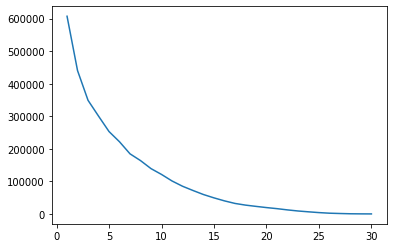

In [ ]:
import matplotlib
from matplotlib import pyplot as plt
plt.plot(one_to_features_num,inertia)

Проводим аналогичные действия для tf.

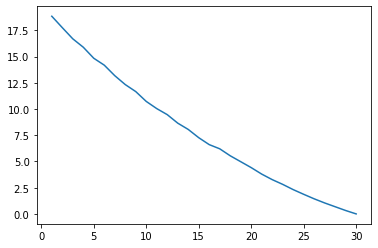

In [ ]:
inertia = []
for i in one_to_features_num:
  km.set_params(n_clusters = i,n_init = 20)
  km.fit(data_tf)
  inertia.append(km.inertia_)
plt.plot(one_to_features_num,inertia)

И теперь с td-idf.

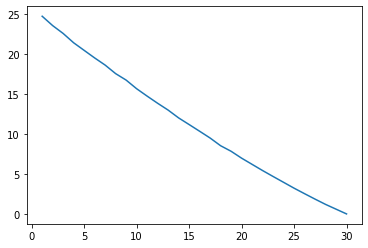

In [ ]:
inertia = []
for i in one_to_features_num:
  km.set_params(n_clusters = i,n_init = 20)
  km.fit(data_tf_idf)
  inertia.append(km.inertia_)
plt.plot(one_to_features_num,inertia)

Во всех случаях нет ярко выраженных локтей. Другие методы подбора подходящего значения k тут не работают, так как для любых 2 партий сложно определить, должны ли они попасть в один кластер, так как о них обычно ничего не известно.

## Иерархическая кластеризация

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import numpy as np
ac = AgglomerativeClustering(distance_threshold=0,n_clusters=None)

Делаем функцию для удобного вывода дендрограммы (https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py).

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

Начинаем кластеризации.

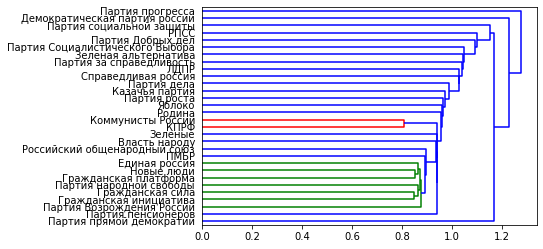

In [ ]:
plot_dendrogram(ac.set_params(linkage='single').fit(data_tf),labels=data_count.index,orientation='right')

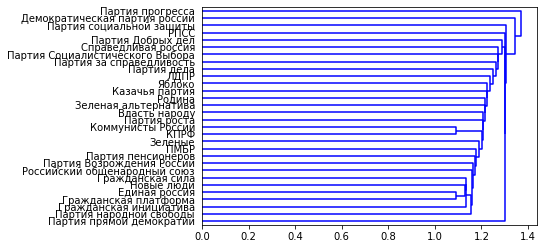

In [ ]:
plot_dendrogram(ac.set_params(linkage='single').fit(data_tf_idf),labels=data_count.index,orientation='right')

Образуется 1 большой кластер, к которому постепенно присоединяются все партии, это явно не то, что хочется видеть.

Теперь average

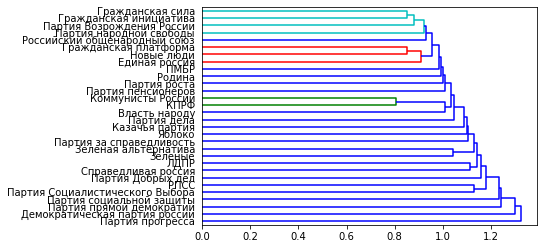

In [ ]:
plot_dendrogram(ac.set_params(linkage='average').fit(data_tf),labels=data_count.index,orientation='right')

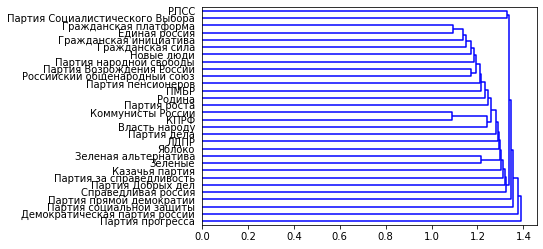

In [ ]:
plot_dendrogram(ac.set_params(linkage='average').fit(data_tf_idf),labels=data_count.index,orientation='right')

Та же самая проблема.

Теперь complete

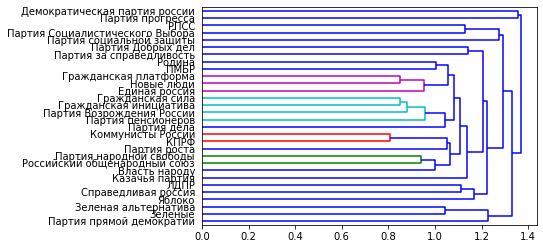

In [ ]:
plot_dendrogram(ac.set_params(linkage='complete').fit(data_tf),labels=data_count.index,orientation='right')

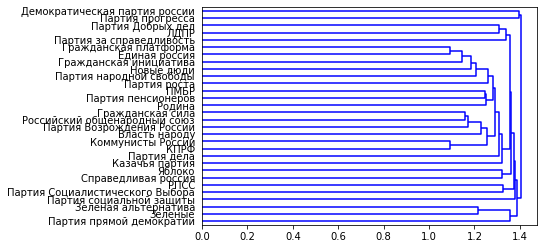

In [ ]:
plot_dendrogram(ac.set_params(linkage='complete').fit(data_tf_idf),labels=data_count.index,orientation='right')

Теперь ward.

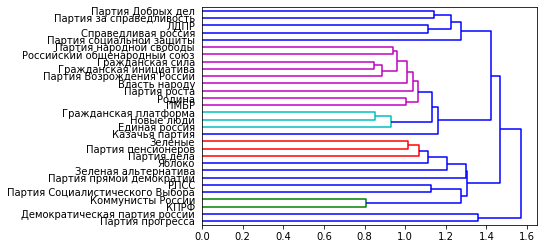

In [ ]:
plot_dendrogram(ac.set_params(linkage='ward').fit(data_tf),labels=data_count.index,orientation='right')

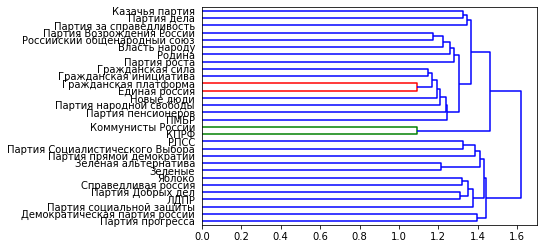

In [ ]:
plot_dendrogram(ac.set_params(linkage='ward').fit(data_tf_idf),labels=data_count.index,orientation='right')

Можно заметить партии, которые всегда или почти всегда соединяются первыми, и следовательно похожи. Это Коммунисты России и КПРФ, Зеленая альтернатива и Зеленые, Демократическая партия России и Партия прогресса, РПСС и Партия социалистического выбора, тройка (Единая Россия, Новые люди, Гражданская платформа), тройка (ЛДПР, Справедливая Россия, Партия добрых дел), четверка (Гражданская сила, Гражданская инициатива, ПМБР, Партия возрождения России). Не наблюдается никакой аналогии между названиями партий и их возможными кластерами.

# Классификация

## Подготовка меток

Классификация делается по попаданию и не попаданию в Госдуму.

У нас есть файл csv, где для каждой партии указано, попадает она в Госдуму или нет. Загружаем его.

In [ ]:
project_dir = "/content/drive/MyDrive/Colab Notebooks/Проект"
labels_path = "партия попала или нет2.csv"
labels = pd.read_csv(os.path.join(project_dir,labels_path),header=None)
labels

,0,1,2
0,1,Власть народу,0
1,2,Гражданская инициатива,0
2,3,Гражданская платформа,0
3,4,Зеленая альтернатива,0
4,5,Зеленые,0
5,6,Коммунисты России,0
6,7,КПРФ,1
7,8,ЛДПР,1
8,9,Новые люди,1
9,10,Партия Возрождения России,0


Теперь нужно изменить порядок партий, чтобы он был, как в таблице данных.

In [ ]:
labels2 = pd.DataFrame({'Попала':list(labels[2])},index=list(labels[1]))

In [ ]:
y = [labels2['Попала'][i] for i in data_count.index]
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## K-neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Посмотрим параметры классификатора.

In [ ]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Делаем сетку параметров для подбора наилучших параметров.

In [ ]:
possible_metrics = ['euclidean','manhattan','chebyshev','minkowski','wminkowski','seuclidean','mahalanobis',
                    'hamming','canberra','braycurtis',
                    'jaccard','matching','matching','dice','kulsinski','rogerstanimoto','russellrao','sokalmichener','sokalsneath']
param_grid1 = {'n_neighbors':range(1,10),'weights':['uniform','distance'],'algorithm':['auto'],'n_jobs': [-1],'metric':possible_metrics,'p':[1]}
param_grid = [param_grid1]

Делаем поиск по сетке c использованием кросс-валидации.

In [ ]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator = KNeighborsClassifier(),param_grid=param_grid,n_jobs = -1)
gs.fit(data_count,y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [0.83333333 0.83333333 0.83333333 0.83333333 0.8        0.8
 0.83333333 0.8        0.83333333 0.83333333 0.83333333 0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.8        0.8        0.8        0.83333333 0.8        0.8
 0.83333333 0.8        0.83333333 0.83333333 0.83333333 0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
        nan        nan        nan        nan        nan        nan
    

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'algorithm': ['auto'],
                          'metric': ['euclidean', 'manhattan', 'chebyshev',
                                     'minkowski', 'wminkowski', 'seuclidean',
                                     'mahalanobis', 'hamming', 'canberra',
                                     'braycurtis', 'jaccard', 'matching',
                                     'matching', 'dice', 'kulsinski',
                                     'rogerstanimoto', 'russellrao',
                                     'sokalmichener', 'sokalsneath'],
                          'n_jobs': [-1], 'n_neighbors': range(1, 10), 'p': [1],
                          'weights': ['uniform', 'distance']}])

Смотрим лучшие найденные параметры.

In [ ]:
gs.best_params_

{'algorithm': 'auto',
 'metric': 'euclidean',
 'n_jobs': -1,
 'n_neighbors': 1,
 'p': 1,
 'weights': 'uniform'}

Смотрим точность, полученную на лучших параметрах, в результате оценки с помощью кросс-валидации.

In [ ]:
gs.best_score_

0.8333333333333334

Получился классификатор, он работает с неплохой точностью.

Попробуем то же самое для tf и tf-idf

In [ ]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator = KNeighborsClassifier(),param_grid=param_grid,n_jobs = -1)
gs.fit(data_tf,y)
print(gs.best_params_)
gs.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [0.8        0.8        0.76666667 0.8        0.76666667 0.76666667
 0.8        0.8        0.8        0.8        0.83333333 0.8
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.66666667 0.66666667 0.8        0.66666667 0.73333333 0.73333333
 0.83333333 0.73333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
        nan        nan        nan        nan        nan        n

{'algorithm': 'auto', 'metric': 'euclidean', 'n_jobs': -1, 'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}


0.8333333333333334

In [ ]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator = KNeighborsClassifier(),param_grid=param_grid,n_jobs = -1)
gs.fit(data_tf_idf,y)
print(gs.best_params_)
gs.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.76666667
 0.83333333 0.8        0.8        0.8        0.83333333 0.8
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.76666667 0.76666667 0.76666667 0.76666667 0.73333333 0.73333333
 0.83333333 0.76666667 0.83333333 0.83333333 0.83333333 0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
        nan        nan        nan        nan        nan        n

{'algorithm': 'auto', 'metric': 'euclidean', 'n_jobs': -1, 'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}


0.8333333333333334

## Наивный Баес

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

Строим модель и смотрим ее точность с помощью кросс валидации. 

In [ ]:
nb = GaussianNB()
cross_val_score(nb,data_count,y,cv=RepeatedKFold(n_splits=5,n_repeats=100)).mean()

0.811

Теперь tf.

In [ ]:
nb = GaussianNB()
cross_val_score(nb,data_tf,y,cv=RepeatedKFold(n_splits=5,n_repeats=100)).mean()

0.8116666666666666

И tf-idf.

In [ ]:
nb = GaussianNB()
cross_val_score(nb,data_tf,y,cv=RepeatedKFold(n_splits=5,n_repeats=100)).mean()

0.81

## Деревья решений

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from scipy.sparse import csc_matrix
from sklearn.model_selection import GridSearchCV
import numpy as np

Делаем сетку параметров для подбора наилучших, и делаем поиск по сетке, чтобы найти наилучший параметр. Перед fit делаем преобразование датасета в формат csc_matrix, чтобы fit делался быстрее.

In [ ]:
param_grid = [{'max_depth':range(1,10),'min_samples_split':range(2,10)}]
gs = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param_grid,n_jobs=-1)
gs.fit(data_count,y)
print(gs.best_score_)
tree_params = gs.best_params_
tree_params

0.7666666666666667


{'max_depth': 4, 'min_samples_split': 2}

Строим получившееся дерево.

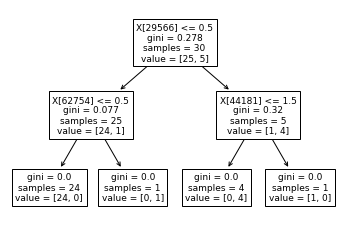

In [ ]:
from sklearn import tree
proba = tree.plot_tree(gs.best_estimator_)

value - Это распределение по классам примеров, которые попали в этот узел.

Тут мы не будем интерпретировать результаты, к этому моменту уже установлено, что метрика для классификации выбрана ненужная нам. С этим всем будет сделан новый блокнот.

Построим классификатор также для tf и tf-idf.

In [ ]:
param_grid = [{'max_depth':range(1,10),'min_samples_split':range(2,10)}]
gs = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param_grid,n_jobs=-1)
gs.fit(data_tf,y)
print(gs.best_score_)
tree_params = gs.best_params_
tree_params

0.8


{'max_depth': 2, 'min_samples_split': 3}

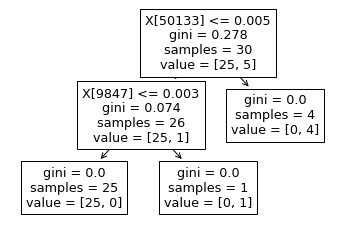

In [ ]:
from sklearn import tree
proba = tree.plot_tree(gs.best_estimator_)

In [ ]:
param_grid = [{'max_depth':range(1,10),'min_samples_split':range(2,10)}]
gs = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param_grid,n_jobs=-1)
gs.fit(data_tf_idf,y)
print(gs.best_score_)
tree_params = gs.best_params_
tree_params

0.8


{'max_depth': 5, 'min_samples_split': 2}

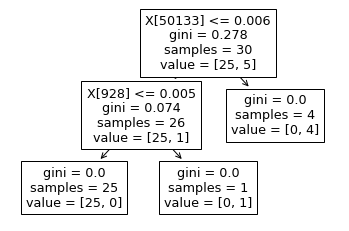

In [ ]:
from sklearn import tree
proba = tree.plot_tree(gs.best_estimator_)

## SVM

In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Строим модель методом опорных векторов для линейного ядра и оцениваем ее точность на кросс валидации.

In [ ]:
lin_svm = svm.LinearSVC()
print(cross_val_score(lin_svm,data_count,y).mean(),
      cross_val_score(lin_svm,data_tf,y).mean(),
      cross_val_score(lin_svm,data_tf_idf,y).mean())

0.8333333333333334 0.8333333333333334 0.8333333333333334


То же самое делаем для других ядер.

In [ ]:
svm_est = svm.SVC()
param_grid = [{'kernel':['polynomial','rbf','sigmoid']}]
gs = GridSearchCV(svm_est,param_grid=param_grid,n_jobs=-1)
gs.fit(data_count,y)
print('best score: ',gs.best_score_)
gs.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    random_seed=random_seed,
  File "sklearn/svm/_libsvm.pyx", line 173

best score:  0.8333333333333334


{'kernel': 'rbf'}

In [ ]:
svm_est = svm.SVC()
param_grid = [{'kernel':['polynomial','rbf','sigmoid']}]
gs = GridSearchCV(svm_est,param_grid=param_grid,n_jobs=-1)
gs.fit(data_tf,y)
print('best score: ',gs.best_score_)
gs.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    random_seed=random_seed,
  File "sklearn/svm/_libsvm.pyx", line 173

best score:  0.8333333333333334


{'kernel': 'rbf'}

In [ ]:
svm_est = svm.SVC()
param_grid = [{'kernel':['polynomial','rbf','sigmoid']}]
gs = GridSearchCV(svm_est,param_grid=param_grid,n_jobs=-1)
gs.fit(data_tf_idf,y)
print('best score: ',gs.best_score_)
gs.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    random_seed=random_seed,
  File "sklearn/svm/_libsvm.pyx", line 173

best score:  0.8333333333333334


{'kernel': 'rbf'}